# Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
df = pd.read_parquet("WIN_DATAPREP_FINAL_MOCK.parquet")

In [ ]:
df.head()

,CST_ID,TRANS_DATE,PRODUCT_TYPE,PRODUCT_BRAND,SHOPPER,CST_SINCE
0,157105.0,2023-09-28,SNACKS,Lay's,Monthly,2023-08-09
1,374554.0,2024-03-17,HEALTH & WELLNESS,Nature's Bounty,Cost-Conscious,2022-01-08
2,374554.0,2024-03-12,HEALTH & WELLNESS,Garden of Life,Cost-Conscious,2022-01-13
3,374554.0,2022-04-03,SNACKS,Lay's,Cost-Conscious,2022-01-09
4,374554.0,2022-02-26,SNACKS,Lay's,Cost-Conscious,2022-01-09


In [ ]:
df.shape

(161691, 6)

In [ ]:
df.isnull().sum()

CST_ID           0
TRANS_DATE       0
PRODUCT_TYPE     0
PRODUCT_BRAND    0
SHOPPER          0
CST_SINCE        0
dtype: int64

In [ ]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows

,CST_ID,TRANS_DATE,PRODUCT_TYPE,PRODUCT_BRAND,SHOPPER,CST_SINCE
57239,854262.0,2024-03-12,SNACKS,Fiber One Bars,Monthly,2019-05-26
57240,854262.0,2024-03-12,SNACKS,Fiber One Bars,Monthly,2019-05-26
64853,374522.0,2022-11-12,SNACKS,Clif Bar,Monthly,2015-10-23
64854,374522.0,2022-11-12,SNACKS,Clif Bar,Monthly,2015-10-23
168479,14390.0,2022-09-27,SNACKS,Lay's,Cost-Conscious,2021-11-08
168480,14390.0,2022-09-27,SNACKS,Lay's,Cost-Conscious,2021-11-08


In [ ]:
# Note: "CST_SINCE" seems to be inconsistent
df[df['CST_ID']==14390.0]

,CST_ID,TRANS_DATE,PRODUCT_TYPE,PRODUCT_BRAND,SHOPPER,CST_SINCE
168479,14390.0,2022-09-27,SNACKS,Lay's,Cost-Conscious,2021-11-08
168480,14390.0,2022-09-27,SNACKS,Lay's,Cost-Conscious,2021-11-08
168481,14390.0,2022-09-27,SNACKS,Lay's,Cost-Conscious,2021-11-12
168482,14390.0,2021-12-23,SNACKS,Lay's,Cost-Conscious,2021-11-15


In [ ]:
df.nunique()

CST_ID           85164
TRANS_DATE        7532
PRODUCT_TYPE         6
PRODUCT_BRAND      128
SHOPPER              4
CST_SINCE         9405
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161691 entries, 0 to 179636
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   CST_ID         161691 non-null  float64       
 1   TRANS_DATE     161691 non-null  datetime64[ns]
 2   PRODUCT_TYPE   161691 non-null  object        
 3   PRODUCT_BRAND  161691 non-null  object        
 4   SHOPPER        161691 non-null  object        
 5   CST_SINCE      161691 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 8.6+ MB


In [ ]:
product_list = df["PRODUCT_TYPE"].unique().tolist()
product_list

['SNACKS',
 'HEALTH & WELLNESS',
 'MEAT & SEAFOOD',
 'CONDIMENTS',
 'BEVERAGES',
 'HOUSEHOLD & CLEANING SUPPLIES']

In [ ]:
brand_list = df["PRODUCT_BRAND"].unique().tolist()
len(brand_list)

128

In [ ]:
shopper_list = df["SHOPPER"].unique().tolist()
shopper_list

['Monthly', 'Cost-Conscious', 'Luxurious', 'Occasional']

In [ ]:
min(df["CST_SINCE"])

Timestamp('1993-01-16 00:00:00')

In [ ]:
max(df["CST_SINCE"])

Timestamp('2024-01-16 00:00:00')

In [ ]:
# Checking if customers' SHOPPER tag is consistent

check = df.groupby('CST_ID')['SHOPPER'].nunique()
check[check > 1]

Series([], Name: SHOPPER, dtype: int64)

In [ ]:
# Checking if customers' CST_Since tag is consistent

check = df.groupby('CST_ID')['CST_SINCE'].nunique()
check[check > 1]

CST_ID
19.0        2
31.0        3
47.0        2
133.0       5
147.0       2
           ..
999897.0    3
999903.0    4
999922.0    2
999931.0    2
999972.0    2
Name: CST_SINCE, Length: 33251, dtype: int64

In [ ]:
first_trans_date = df.groupby('CST_ID')['TRANS_DATE'].min().reset_index()
first_trans_date.columns = ['CST_ID', 'FIRST_TRANS_DATE']
first_trans_date['YEAR'] = first_trans_date['FIRST_TRANS_DATE'].dt.year
first_trans_date

,CST_ID,FIRST_TRANS_DATE,YEAR
0,19.0,2023-12-17,2023
1,31.0,2010-03-17,2010
2,36.0,2023-08-09,2023
3,47.0,2014-05-17,2014
4,56.0,2023-11-03,2023
...,...,...,...
85159,999912.0,2022-03-18,2022
85160,999922.0,2020-07-12,2020
85161,999931.0,2017-06-25,2017
85162,999972.0,2021-11-28,2021


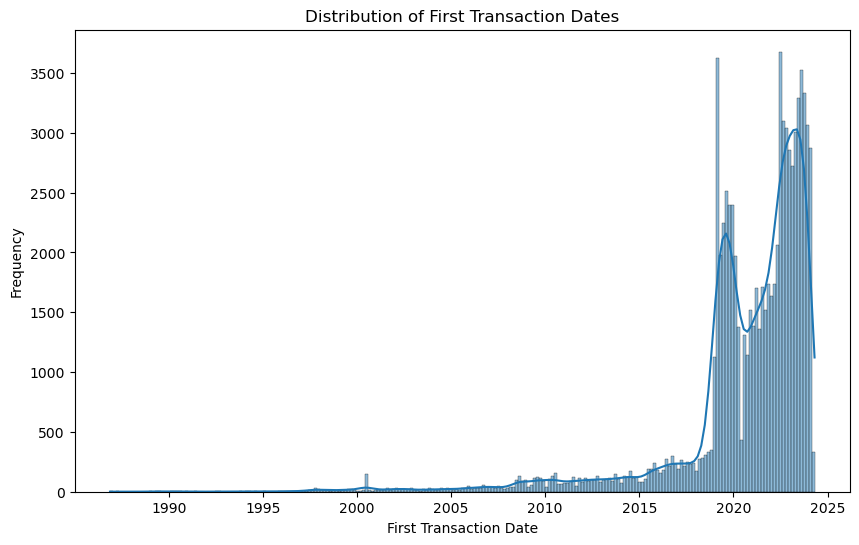

In [ ]:
# Plotting the distribution of first transaction dates
plt.figure(figsize=(10, 6))
sns.histplot(first_trans_date['FIRST_TRANS_DATE'], kde=True)

plt.xlabel('First Transaction Date')
plt.ylabel('Frequency')
plt.title('Distribution of First Transaction Dates')

plt.show()

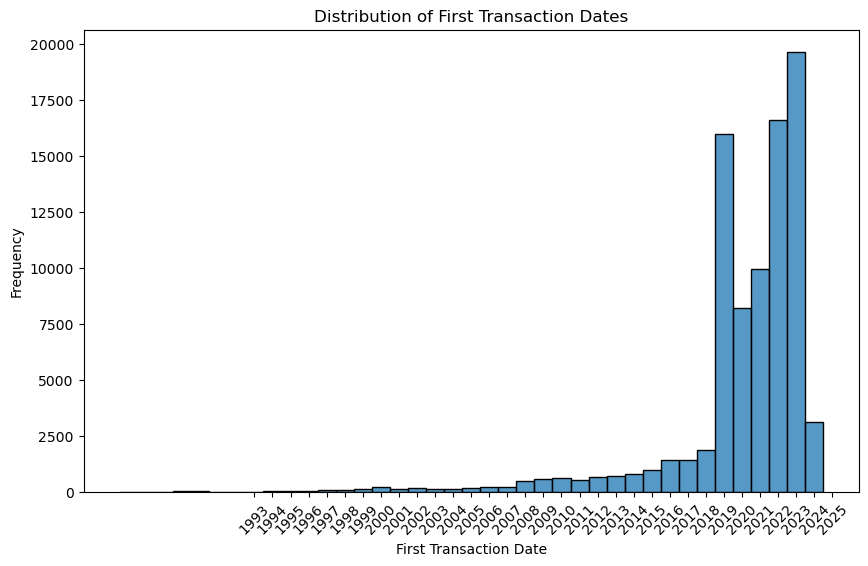

In [ ]:
# Plotting the distribution of first transaction dates
plt.figure(figsize=(10, 6))
sns.histplot(first_trans_date['YEAR'], bins=range(1993, 2026), kde=False, discrete=True)

plt.xlabel('First Transaction Date')
plt.ylabel('Frequency')
plt.title('Distribution of First Transaction Dates')
plt.xticks(range(1993, 2026), rotation=45)

plt.show()


In [ ]:
# We replace CST_Since information with their first recorded transaction
df = pd.merge(df, first_trans_date, on='CST_ID', how='inner')
df = df.drop(columns=["CST_SINCE","YEAR"])
df = df.rename(columns={'FIRST_TRANS_DATE': 'CST_SINCE'})
df.head()

,CST_ID,TRANS_DATE,PRODUCT_TYPE,PRODUCT_BRAND,SHOPPER,CST_SINCE
0,157105.0,2023-09-28,SNACKS,Lay's,Monthly,2023-09-28
1,374554.0,2024-03-17,HEALTH & WELLNESS,Nature's Bounty,Cost-Conscious,2022-02-26
2,374554.0,2024-03-12,HEALTH & WELLNESS,Garden of Life,Cost-Conscious,2022-02-26
3,374554.0,2022-04-03,SNACKS,Lay's,Cost-Conscious,2022-02-26
4,374554.0,2022-02-26,SNACKS,Lay's,Cost-Conscious,2022-02-26


In [ ]:
# Since there is a significant spike in rise of new customers in 2019, we will only consider data from 2019 onwards
rec_df = df[df['CST_SINCE'] >= '2019-01-01']
rec_df

,CST_ID,TRANS_DATE,PRODUCT_TYPE,PRODUCT_BRAND,SHOPPER,CST_SINCE
0,157105.0,2023-09-28,SNACKS,Lay's,Monthly,2023-09-28
1,374554.0,2024-03-17,HEALTH & WELLNESS,Nature's Bounty,Cost-Conscious,2022-02-26
2,374554.0,2024-03-12,HEALTH & WELLNESS,Garden of Life,Cost-Conscious,2022-02-26
3,374554.0,2022-04-03,SNACKS,Lay's,Cost-Conscious,2022-02-26
4,374554.0,2022-02-26,SNACKS,Lay's,Cost-Conscious,2022-02-26
...,...,...,...,...,...,...
161686,480556.0,2023-07-13,SNACKS,Lay's,Cost-Conscious,2023-07-13
161687,554477.0,2021-04-15,SNACKS,Lay's,Cost-Conscious,2021-04-15
161688,522219.0,2019-03-01,SNACKS,Lay's,Cost-Conscious,2019-03-01
161689,633293.0,2021-06-15,SNACKS,Lay's,Luxurious,2021-06-15


# FP-Growth

In [ ]:
# !pip uninstall numpy -y
# !pip cache purge
# !pip install numpy mlxtend
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder


In [ ]:
# Creating a backup

assoc_df = rec_df.copy()
assoc_df.head()

,CST_ID,TRANS_DATE,PRODUCT_TYPE,PRODUCT_BRAND,SHOPPER,CST_SINCE
0,157105.0,2023-09-28,SNACKS,Lay's,Monthly,2023-09-28
1,374554.0,2024-03-17,HEALTH & WELLNESS,Nature's Bounty,Cost-Conscious,2022-02-26
2,374554.0,2024-03-12,HEALTH & WELLNESS,Garden of Life,Cost-Conscious,2022-02-26
3,374554.0,2022-04-03,SNACKS,Lay's,Cost-Conscious,2022-02-26
4,374554.0,2022-02-26,SNACKS,Lay's,Cost-Conscious,2022-02-26


In [ ]:
assoc_df = rec_df.copy()
assoc_df = assoc_df.groupby(['CST_ID', 'TRANS_DATE', 'PRODUCT_BRAND']).size().reset_index(name='FREQUENCY')
assoc_df

,CST_ID,TRANS_DATE,PRODUCT_BRAND,FREQUENCY
0,19.0,2023-12-17,Garden of Life,1
1,19.0,2023-12-21,Nature's Bounty,1
2,36.0,2023-08-09,Cheetos,1
3,56.0,2023-11-03,Lay's,1
4,59.0,2024-01-18,Doritos,1
...,...,...,...,...
121536,999922.0,2020-07-12,Ruffles,1
121537,999922.0,2020-07-14,Lay's,1
121538,999972.0,2021-11-28,Ruffles,1
121539,999972.0,2021-12-06,Lay's,1


In [ ]:
# Checking customers buying multiple products of the same brand
assoc_df[assoc_df["CST_ID"]==14390.0]

,CST_ID,TRANS_DATE,PRODUCT_BRAND,FREQUENCY
1744,14390.0,2021-12-23,Lay's,1
1745,14390.0,2022-09-27,Lay's,3


In [ ]:
# Checking the first appearance of trxn with more than 1 element

assoc_df[assoc_df["CST_ID"]==611.0]

,CST_ID,TRANS_DATE,PRODUCT_BRAND,FREQUENCY
62,611.0,2019-09-19,Pringles,1
63,611.0,2019-09-26,Lay's,1
64,611.0,2019-09-26,Ruffles,1


In [ ]:
# Turning the data into list that is useful for FP Growth algorithm

trxns = []
current_trxn = None

for i, row in assoc_df.iterrows():
    trxn = []
    customer_id = row['CST_ID']
    trans_date = row['TRANS_DATE']
    product_brand = row['PRODUCT_BRAND']
    frequency = row['FREQUENCY']

    if current_trxn is None or current_trxn[0] != customer_id or current_trxn[1] != trans_date:
        if current_trxn is not None:
            trxns.append(current_trxn[2])
        current_trxn = [customer_id, trans_date, []]
    current_trxn[2].extend([product_brand] * frequency)

if current_trxn is not None:
    trxns.append(current_trxn[2])

trxns

[['Garden of Life'],
 ["Nature's Bounty"],
 ['Cheetos'],
 ["Lay's"],
 ['Doritos'],
 ['Monterey'],
 ['Goldfish'],
 ["Lay's"],
 ['Fritos'],
 ['New Chapter'],
 ['Monterey'],
 ['Garden of Life'],
 ['Monterey'],
 ['Monterey'],
 ['Doritos'],
 ['Nestlé'],
 ["Lay's"],
 ['Doritos'],
 ["Lay's"],
 ['Nestlé'],
 ["Lay's"],
 ["Lay's"],
 ["Nature's Bounty"],
 ['Garden of Life'],
 ['Cheetos'],
 ['Fritos'],
 ['Cheetos'],
 ["Lay's"],
 ['Doritos'],
 ["Lay's"],
 ['New Chapter'],
 ['Garden of Life'],
 ['Monterey'],
 ['Fig Newtons'],
 ['Del Monte'],
 ["Lay's"],
 ["Nature's Bounty"],
 ['Nestlé'],
 ["Lay's"],
 ['Doritos'],
 ["Lay's"],
 ["Nature's Bounty"],
 ['Doritos'],
 ['Goldfish'],
 ['Doritos'],
 ["Nature's Bounty"],
 ['Garden of Life'],
 ["Lay's"],
 ["Lay's"],
 ['Doritos'],
 ["Lay's"],
 ['Doritos'],
 ['Nestlé'],
 ['Goldfish'],
 ['Fresh Options'],
 ['San Miguel'],
 ['Fritos'],
 ['Cheetos'],
 ['Doritos'],
 ['BelVita'],
 ["Lay's"],
 ["Lay's"],
 ['Pringles'],
 ["Lay's", 'Ruffles'],
 ["Lay's"],
 ['Triscuit'],


In [ ]:
# Checking the number of transactions with more than 1 item

count = 0
for trxn in trxns:
    if len(trxn) > 1:
        count += 1
count

992

In [ ]:
# Checking if the number of trxn with more than 1 element matches the number of duplicate entries (992 also)
duplicates = rec_df[rec_df.duplicated(subset=['CST_ID', 'TRANS_DATE'], keep=False)]
unique_combinations = duplicates.drop_duplicates(subset=['CST_ID', 'TRANS_DATE']).groupby(['CST_ID', 'TRANS_DATE']).size().reset_index(name='COUNT')
unique_combinations

,CST_ID,TRANS_DATE,COUNT
0,611.0,2019-09-26,1
1,1135.0,2020-08-22,1
2,2138.0,2019-08-31,1
3,2138.0,2023-07-23,1
4,2522.0,2019-05-06,1
...,...,...,...
987,994637.0,2019-06-16,1
988,995401.0,2023-03-28,1
989,996898.0,2023-10-02,1
990,997933.0,2019-10-21,1


In [ ]:
# FP Growth

te = TransactionEncoder()
te_ary = te.fit(trxns).transform(trxns)
fp_df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpgrowth(fp_df, min_support=0.00001, use_colnames = True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending = False)
frequent_itemsets.head(20)

,support,itemsets
3,0.411558,(Lay's)
4,0.099387,(Doritos)
1,0.075225,(Nature's Bounty)
0,0.054272,(Garden of Life)
7,0.041067,(Fritos)
2,0.038363,(Cheetos)
9,0.034373,(Nestlé)
6,0.029396,(Goldfish)
11,0.029040,(Del Monte)
5,0.027397,(Monterey)


All of the top results are itemsets of single item. Also, except for ("Lay's"), all the support are less than 0.1. Let us try FP Growth for itemsets of multiple items only.

# FP Growth (for trxns with multiple items)

In [ ]:
mod_trxns = []
for trxn in trxns:
    if len(trxn) > 1:
        mod_trxns.append(trxn)
mod_trxns

[["Lay's", 'Ruffles'],
 ['Downy', 'Mr. Clean'],
 ["Lay's", 'Ruffles'],
 ['Doritos', "Lay's"],
 ["Lay's", 'Ruffles'],
 ["Lay's", 'Quaker Chewy Bars'],
 ['Garden of Life', 'Nordic Naturals'],
 ['Garden of Life', 'Nordic Naturals'],
 ['Cheetos', "Lay's"],
 ["Lay's", 'Pringles'],
 ['Pringles', 'Ruffles'],
 ['Fig Newtons', 'Teddy Grahams'],
 ["Lay's", 'Mr. Clean'],
 ['Downy', 'Zonrox'],
 ['Pringles', 'Ruffles'],
 ['Tide', 'Wheat Thins'],
 ["Lay's", 'Pringles'],
 ["Lay's", 'Ruffles'],
 ['Garden of Life', "Lay's"],
 ["Lay's", 'Pringles'],
 ['Garden of Life', 'Nordic Naturals'],
 ['Del Monte', "Lay's"],
 ['Del Monte', "Lay's"],
 ["Lay's", 'Triscuit'],
 ['New Chapter', 'Nordic Naturals'],
 ["Lay's", "Lay's", "Lay's"],
 ['Garden of Life', 'New Chapter'],
 ['Fig Newtons', 'Teddy Grahams'],
 ['Gaia Herbs', "Nature's Bounty"],
 ["Lay's", 'Ruffles'],
 ['Cif', 'Domex'],
 ['Mr. Clean', 'Ruffles'],
 ['Four Sigmatic', 'Garden of Life'],
 ['Clif Bar', "Lay's"],
 ['Clif Bar', "Lay's"],
 ["Lay's", 'Pringle

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(mod_trxns).transform(mod_trxns)
mod_fp_df = pd.DataFrame(te_ary, columns=te.columns_)

mod_frequent_itemsets = fpgrowth(mod_fp_df, min_support=0.00000001, use_colnames = True)
mod_frequent_itemsets = mod_frequent_itemsets.sort_values(by='support', ascending = False)
mod_frequent_itemsets = mod_frequent_itemsets[mod_frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)] #displays itemsets with more than 1 item only
mod_frequent_itemsets

,support,itemsets
65,0.132056,"(Lay's, Ruffles)"
118,0.125000,"(Garden of Life, Nature's Bounty)"
91,0.115927,"(Pringles, Lay's)"
116,0.054435,"(New Chapter, Garden of Life)"
85,0.046371,"(Garden of Life, Nordic Naturals)"
...,...,...
130,0.001008,"(Domex, Ruffles)"
128,0.001008,"(Fritos, Domex)"
127,0.001008,"(Clif Bar, Domex)"
126,0.001008,"(Four Sigmatic, Lay's, Gaia Herbs)"


In [ ]:
fp_rules = []

for i, row in mod_frequent_itemsets.iterrows():
    itemset = row['itemsets']
    support = row['support']
    fp_rules.append((itemset, support))

fp_rules

[(frozenset({"Lay's", 'Ruffles'}), 0.13205645161290322),
 (frozenset({'Garden of Life', "Nature's Bounty"}), 0.125),
 (frozenset({"Lay's", 'Pringles'}), 0.1159274193548387),
 (frozenset({'Garden of Life', 'New Chapter'}), 0.05443548387096774),
 (frozenset({'Garden of Life', 'Nordic Naturals'}), 0.046370967741935484),
 (frozenset({'Fritos', "Lay's"}), 0.03225806451612903),
 (frozenset({'Del Monte', "Lay's"}), 0.025201612903225805),
 (frozenset({'Chips Ahoy!', 'Wheat Thins'}), 0.019153225806451613),
 (frozenset({"Lay's", 'Nestlé'}), 0.017137096774193547),
 (frozenset({"Lay's", 'Quaker Chewy Bars'}), 0.014112903225806451),
 (frozenset({'Four Sigmatic', 'Garden of Life'}), 0.014112903225806451),
 (frozenset({'Doritos', "Lay's"}), 0.01310483870967742),
 (frozenset({'Cheetos', "Lay's"}), 0.012096774193548387),
 (frozenset({'Monterey', "Nature's Bounty"}), 0.012096774193548387),
 (frozenset({'Downy', 'Mr. Clean'}), 0.012096774193548387),
 (frozenset({'Clif Bar', 'Fritos'}), 0.0110887096774193

In [ ]:
# Defining a recommender function based on the support metrics of FP Growth algorithm

def recommend_fp(input_items, association_rules=fp_rules, top_n=3):
    recommendations = []
    relevant_rules = []
    for rule, support in association_rules:
        if all(item in rule for item in input_items) and list(rule) != input_items:
            relevant_rules.append((rule, support))

    for rule, support in relevant_rules:
        current_recommendation = []
        for item in rule:
            if item not in input_items:
                current_recommendation.append(item)
        recommendations.append((current_recommendation, support))
    sorted_recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)[:top_n]
    return sorted_recommendations

In [ ]:
recommend_fp(["Lay's", "Ruffles"])

[(['Pringles'], 0.0020161290322580645),
 (['Pringles', 'Quaker Chewy Bars'], 0.0010080645161290322),
 (['Quaker Chewy Bars'], 0.0010080645161290322)]

The low support for all itemsets is very noticeable. Only three itemsets have support greater than 0.1. This must be due to the fact that most transactions includes only 1 item.

# Apriori (for trxns with multiple items)

In [ ]:
# !pip install apyori
import io
from apyori import apriori

In [ ]:
# Note: we only consider itemsets with more than 2 items
results = list(apriori(transactions=mod_trxns,
                       min_support=0.000001,
                       min_confidence=0.000001,
                       min_lift=0.000001,
                       min_length=2,
                       max_length=None))

In [ ]:
def format_results(results):
    rows = []
    for result in results:
        support = result.support
        for ordered_stat in result.ordered_statistics:
            row = {
                'Items': ', '.join(list(ordered_stat.items_base) + list(ordered_stat.items_add)),
                'Support': support
            }
            rows.append(row)
    return pd.DataFrame(rows)

In [ ]:
ap_df = format_results(results)
ap_df = ap_df.sort_values(by='Support', ascending = False)

In [ ]:
ap_df

,Items,Support
24,Lay's,0.448589
20,Garden of Life,0.288306
33,Nature's Bounty,0.169355
46,Ruffles,0.154234
405,"Lay's, Ruffles",0.132056
...,...,...
288,"Fritos, Ritz",0.001008
287,"Ritz, Fritos",0.001008
280,"NOW Foods, Fritos",0.001008
279,"Fritos, NOW Foods",0.001008


In [ ]:
# Transforming the df into a format that is recognized by the recommender function we defined for FP Growth
# Cannot be ran twice!!!

ap_df['support'] = ap_df['Support']

def frozen_sets(items):
    item_list = [item.strip() for item in items.split(',')]
    return frozenset(tuple(item_list))

ap_df['itemsets'] = ap_df['Items'].apply(frozen_sets)
ap_df=ap_df.drop_duplicates(subset=['itemsets'])
ap_df=ap_df.drop(columns = ["Items", "Support"])
ap_df=ap_df[ap_df["itemsets"].apply(lambda x: len(x) > 1)]
ap_df

,support,itemsets
405,0.132056,"(Lay's, Ruffles)"
343,0.125000,"(Garden of Life, Nature's Bounty)"
397,0.115927,"(Pringles, Lay's)"
344,0.054435,"(New Chapter, Garden of Life)"
349,0.046371,"(Garden of Life, Nordic Naturals)"
...,...,...
307,0.001008,"(Utz, Fritos)"
304,0.001008,"(Fritos, UFC)"
301,0.001008,"(Triscuit, Fritos)"
295,0.001008,"(Safeguard, Fritos)"


In [ ]:
ap_df.head(10)

,support,itemsets
405,0.132056,"(Lay's, Ruffles)"
343,0.125000,"(Garden of Life, Nature's Bounty)"
397,0.115927,"(Pringles, Lay's)"
344,0.054435,"(New Chapter, Garden of Life)"
349,0.046371,"(Garden of Life, Nordic Naturals)"
270,0.032258,"(Fritos, Lay's)"
155,0.025202,"(Del Monte, Lay's)"
129,0.019153,"(Wheat Thins, Chips Ahoy!)"
382,0.017137,"(Nestlé, Lay's)"
399,0.014113,"(Lay's, Quaker Chewy Bars)"


In [ ]:
ap_rules = []

for i, row in ap_df.iterrows():
    itemset = row['itemsets']
    support = row['support']
    ap_rules.append((itemset, support))

ap_rules

[(frozenset({"Lay's", 'Ruffles'}), 0.13205645161290322),
 (frozenset({'Garden of Life', "Nature's Bounty"}), 0.125),
 (frozenset({"Lay's", 'Pringles'}), 0.1159274193548387),
 (frozenset({'Garden of Life', 'New Chapter'}), 0.05443548387096774),
 (frozenset({'Garden of Life', 'Nordic Naturals'}), 0.046370967741935484),
 (frozenset({'Fritos', "Lay's"}), 0.03225806451612903),
 (frozenset({'Del Monte', "Lay's"}), 0.025201612903225805),
 (frozenset({'Chips Ahoy!', 'Wheat Thins'}), 0.019153225806451613),
 (frozenset({"Lay's", 'Nestlé'}), 0.017137096774193547),
 (frozenset({"Lay's", 'Quaker Chewy Bars'}), 0.014112903225806451),
 (frozenset({'Four Sigmatic', 'Garden of Life'}), 0.014112903225806451),
 (frozenset({'Doritos', "Lay's"}), 0.01310483870967742),
 (frozenset({'Monterey', "Nature's Bounty"}), 0.012096774193548387),
 (frozenset({'Cheetos', "Lay's"}), 0.012096774193548387),
 (frozenset({'Downy', 'Mr. Clean'}), 0.012096774193548387),
 (frozenset({'Cheetos', 'Doritos'}), 0.0110887096774193

In [ ]:
# Defining a recommender function based on apriori algorithm

def recommend_ap(input_items, association_rules=ap_rules, top_n=3):
    recommendations = []
    relevant_rules = []
    for rule, support in association_rules:
        if all(item in rule for item in input_items) and list(rule) != input_items:
            relevant_rules.append((rule, support))

    for rule, support in relevant_rules:
        current_recommendation = []
        for item in rule:
            if item not in input_items:
                current_recommendation.append(item)
        recommendations.append((current_recommendation, support))
    sorted_recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)[:top_n]
    return sorted_recommendations

In [ ]:
recommend_ap(["Garden of Life"])

[(["Nature's Bounty"], 0.125),
 (['New Chapter'], 0.05443548387096774),
 (['Nordic Naturals'], 0.046370967741935484)]

It is still noticeable that the support is low. Only 3 itemsets (with multiple items) have support greater than 0.1. Since most of the transactions are of single item, let us try sequential mining instead.

# SPADE (Apriori Sequence Mining)

In [ ]:
#!pip install Cython pycspade #Microsoft Visual C++ 14.0 or greater is required.
from pycspade.helpers import spade, print_result

In [ ]:
seq_df = rec_df.sort_values(by=['CST_ID', 'TRANS_DATE'])
seq_df.head()

,CST_ID,TRANS_DATE,PRODUCT_TYPE,PRODUCT_BRAND,SHOPPER,CST_SINCE
2809,19.0,2023-12-17,HEALTH & WELLNESS,Garden of Life,Luxurious,2023-12-17
2810,19.0,2023-12-21,HEALTH & WELLNESS,Nature's Bounty,Luxurious,2023-12-17
26988,36.0,2023-08-09,SNACKS,Cheetos,Cost-Conscious,2023-08-09
138538,56.0,2023-11-03,SNACKS,Lay's,Cost-Conscious,2023-11-03
73146,59.0,2024-01-18,SNACKS,Doritos,Cost-Conscious,2024-01-18


In [ ]:
seq_df['ORDER_NUM'] = seq_df.groupby('CST_ID')['TRANS_DATE'].rank(method='dense').astype(int)
seq_df

,CST_ID,TRANS_DATE,PRODUCT_TYPE,PRODUCT_BRAND,SHOPPER,CST_SINCE,ORDER_NUM
2809,19.0,2023-12-17,HEALTH & WELLNESS,Garden of Life,Luxurious,2023-12-17,1
2810,19.0,2023-12-21,HEALTH & WELLNESS,Nature's Bounty,Luxurious,2023-12-17,2
26988,36.0,2023-08-09,SNACKS,Cheetos,Cost-Conscious,2023-08-09,1
138538,56.0,2023-11-03,SNACKS,Lay's,Cost-Conscious,2023-11-03,1
73146,59.0,2024-01-18,SNACKS,Doritos,Cost-Conscious,2024-01-18,1
...,...,...,...,...,...,...,...
74983,999922.0,2020-07-12,SNACKS,Ruffles,Cost-Conscious,2020-07-12,1
74982,999922.0,2020-07-14,SNACKS,Lay's,Cost-Conscious,2020-07-12,2
134136,999972.0,2021-11-28,SNACKS,Ruffles,Cost-Conscious,2021-11-28,1
134135,999972.0,2021-12-06,SNACKS,Lay's,Cost-Conscious,2021-11-28,2


In [ ]:
seq_df[seq_df["CST_ID"]==611.0]

,CST_ID,TRANS_DATE,PRODUCT_TYPE,PRODUCT_BRAND,SHOPPER,CST_SINCE,ORDER_NUM
50356,611.0,2019-09-19,SNACKS,Pringles,Cost-Conscious,2019-09-19,1
50357,611.0,2019-09-26,SNACKS,Lay's,Cost-Conscious,2019-09-19,2
50358,611.0,2019-09-26,SNACKS,Ruffles,Cost-Conscious,2019-09-19,2


In [ ]:
seq_df['PRODUCT_ID'] = pd.factorize(seq_df['PRODUCT_BRAND'])[0]

In [ ]:
brand_map = seq_df[['PRODUCT_BRAND','PRODUCT_ID']].drop_duplicates()
brand_map

,PRODUCT_BRAND,PRODUCT_ID
2809,Garden of Life,0
2810,Nature's Bounty,1
26988,Cheetos,2
138538,Lay's,3
73146,Doritos,4
...,...,...
48991,Soylent,105
86997,Annie Chun's,106
7774,That's It,107
90603,Zing Bars,108


In [ ]:
'''
seq_trxns = []
for cst_id, group in seq_df.groupby('CST_ID'):
    for order_num, order_group in group.groupby('ORDER_NUM'):
        itemset = order_group['PRODUCT_ID'].tolist()
        seq_trxns.append([cst_id, order_num, itemset])
'''

In [ ]:
# wont be used for now as SPADE does not run
'''
seq_trxns_txt = []
for cst_id, group in seq_df.groupby('CST_ID'):
    for order_num, order_group in group.groupby('ORDER_NUM'):
        itemset = order_group['PRODUCT_ID'].tolist()
        seq_trxns_txt.append([cst_id, order_num, len(itemset), itemset])
'''

In [ ]:
seq_trxns_txt[:15]


[[19.0, 1, 1, [0]],
 [19.0, 2, 1, [1]],
 [36.0, 1, 1, [2]],
 [56.0, 1, 1, [3]],
 [59.0, 1, 1, [4]],
 [86.0, 1, 1, [5]],
 [99.0, 1, 1, [6]],
 [101.0, 1, 1, [3]],
 [133.0, 1, 1, [7]],
 [133.0, 2, 1, [8]],
 [133.0, 3, 1, [5]],
 [133.0, 4, 1, [0]],
 [133.0, 5, 1, [5]],
 [133.0, 6, 1, [5]],
 [139.0, 1, 1, [4]]]

In [ ]:
seq_df.head(15)

,CST_ID,TRANS_DATE,PRODUCT_TYPE,PRODUCT_BRAND,SHOPPER,CST_SINCE,ORDER_NUM,PRODUCT_ID
2809,19.0,2023-12-17,HEALTH & WELLNESS,Garden of Life,Luxurious,2023-12-17,1,0
2810,19.0,2023-12-21,HEALTH & WELLNESS,Nature's Bounty,Luxurious,2023-12-17,2,1
26988,36.0,2023-08-09,SNACKS,Cheetos,Cost-Conscious,2023-08-09,1,2
138538,56.0,2023-11-03,SNACKS,Lay's,Cost-Conscious,2023-11-03,1,3
73146,59.0,2024-01-18,SNACKS,Doritos,Cost-Conscious,2024-01-18,1,4
90025,86.0,2020-01-25,MEAT & SEAFOOD,Monterey,Cost-Conscious,2020-01-25,1,5
149244,99.0,2023-11-19,SNACKS,Goldfish,Monthly,2023-11-19,1,6
90935,101.0,2023-02-06,SNACKS,Lay's,Cost-Conscious,2023-02-06,1,3
20649,133.0,2020-03-22,SNACKS,Fritos,Monthly,2020-03-22,1,7
20648,133.0,2021-09-13,HEALTH & WELLNESS,New Chapter,Monthly,2020-03-22,2,8


In [ ]:
with open('transactions.txt', 'w') as file:
    for line in seq_trxns_txt:
        # Convert each item to string and join with ', '
        clean_line = ', '.join(map(str, line))  # Ensure all items are converted to strings
        file.write(f'{clean_line}\n')

In [ ]:
# Cannot be ran, will look for ways to make this more efficient
'''result = spade(
    filename = 'transactions.txt',
#    data = seq_trxns,
    support=0.5, parse=False)
'''

# GSP
''

In [ ]:
# !pip install gsppy
from gsppy.gsp import GSP

In [ ]:
gsp_trxns = []
for cst_id, group in seq_df.groupby('CST_ID'):
    trxns = []
    for order_num, order_group in group.groupby('ORDER_NUM'):
        itemsets = order_group['PRODUCT_BRAND'].tolist()
        for item in itemsets:
            trxns.append(item)
    gsp_trxns.append(trxns)


In [ ]:
gsp_trxns_t = [tuple(trxns) for trxns in gsp_trxns]

In [ ]:
gsp_trxns

[['Garden of Life', "Nature's Bounty"],
 ['Cheetos'],
 ["Lay's"],
 ['Doritos'],
 ['Monterey'],
 ['Goldfish'],
 ["Lay's"],
 ['Fritos',
  'New Chapter',
  'Monterey',
  'Garden of Life',
  'Monterey',
  'Monterey'],
 ['Doritos'],
 ['Nestlé', "Lay's"],
 ['Doritos'],
 ["Lay's"],
 ['Nestlé'],
 ["Lay's", "Lay's", "Nature's Bounty", 'Garden of Life'],
 ['Cheetos'],
 ['Fritos'],
 ['Cheetos'],
 ["Lay's"],
 ['Doritos'],
 ["Lay's"],
 ['New Chapter', 'Garden of Life', 'Monterey'],
 ['Fig Newtons'],
 ['Del Monte', "Lay's"],
 ["Nature's Bounty", 'Nestlé'],
 ["Lay's"],
 ['Doritos'],
 ["Lay's", "Nature's Bounty", 'Doritos'],
 ['Goldfish'],
 ['Doritos'],
 ["Nature's Bounty", 'Garden of Life'],
 ["Lay's"],
 ["Lay's"],
 ['Doritos'],
 ["Lay's", 'Doritos'],
 ['Nestlé'],
 ['Goldfish'],
 ['Fresh Options', 'San Miguel'],
 ['Fritos'],
 ['Cheetos'],
 ['Doritos'],
 ['BelVita'],
 ["Lay's"],
 ["Lay's"],
 ['Pringles', "Lay's", 'Ruffles'],
 ["Lay's", 'Triscuit'],
 ["Lay's", "Lay's"],
 ["Lay's"],
 ["Lay's"],
 ['Garde

In [ ]:
 transactions = [
            ['Bread', 'Milk'],
            ['Bread', 'Diaper', 'Beer', 'Eggs'],
            ['Milk', 'Diaper', 'Beer', 'Coke'],
            ['Bread', 'Milk', 'Diaper', 'Beer'],
            ['Bread', 'Milk', 'Diaper', 'Coke']
        ]

In [ ]:
transactions

[['Bread', 'Milk'],
 ['Bread', 'Diaper', 'Beer', 'Eggs'],
 ['Milk', 'Diaper', 'Beer', 'Coke'],
 ['Bread', 'Milk', 'Diaper', 'Beer'],
 ['Bread', 'Milk', 'Diaper', 'Coke']]

In [ ]:
GSP(gsp_trxns).search(0.1)

[{("Nature's Bounty",): 8992, ("Lay's",): 43654, ('Doritos',): 11908}]

In [ ]:
result = GSP(gsp_trxns).search(0.01)

filtered_result = []
for itemset in result:
    filtered_itemset = {key: value for key, value in itemset.items() if len(key) >= 2}
    if filtered_itemset:
        filtered_result.append(filtered_itemset)

In [ ]:
filtered_result

[{('Del Monte', "Lay's"): 976,
  ('Garden of Life', "Nature's Bounty"): 778,
  ("Lay's", 'Doritos'): 1867,
  ("Lay's", 'Fritos'): 737,
  ("Lay's", "Lay's"): 3859,
  ("Lay's", "Nature's Bounty"): 2363,
  ("Lay's", 'Nestlé'): 1108,
  ("Lay's", 'Pringles'): 737,
  ("Lay's", 'Ruffles'): 986,
  ("Nature's Bounty", 'Garden of Life'): 2696,
  ('New Chapter', 'Garden of Life'): 960,
  ('Pringles', "Lay's"): 930,
  ('Ruffles', "Lay's"): 839},
 {("Lay's", "Nature's Bounty", 'Garden of Life'): 1075}]

The support of the itemsets with more than one item is less than 0.1.

# Next Steps


Improve the algorithms and determine a metric (on top of support) to evaluate the recommendation process.